In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
salaries_df = pd.read_csv("data/salaries.csv")
departments_df = pd.read_csv("data/departments.csv")
employees_df = pd.read_csv("data/employees.csv")
dept_emp_df = pd.read_csv("data/dept_emp.csv")

In [12]:
salaries_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [13]:
departments_df.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [14]:
employees_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [18]:
dept_emp_df.head()

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [15]:
salaries_employees = pd.merge(salaries_df, employees_df, how="left", on=["emp_no", "emp_no"])
salaries_employees.head()

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,10001,60117,1986-06-26,1987-06-26,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,1996-08-03,1997-08-03,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,1995-12-03,1996-12-02,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,1986-12-01,1987-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,1989-09-12,1990-09-12,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [25]:
departments_dept_emp = pd.merge(departments_df, dept_emp_df, how="left", on=["dept_no", "dept_no"])
departments_dept_emp.head()

,dept_no,dept_name,emp_no,from_date,to_date
0,d001,Marketing,10017,1993-08-03,9999-01-01
1,d001,Marketing,10055,1992-04-27,1995-07-22
2,d001,Marketing,10058,1988-04-25,9999-01-01
3,d001,Marketing,10108,1999-12-06,2001-10-20
4,d001,Marketing,10140,1991-03-14,9999-01-01


In [26]:
salaries_departments = pd.merge(departments_dept_emp_df, salaries_employees, how="left", on=["emp_no", "emp_no"])
salaries_departments.head()

,dept_no,dept_name,emp_no,from_date_x,to_date_x,salary,from_date_y,to_date_y,birth_date,first_name,last_name,gender,hire_date
0,d001,Marketing,10017,1993-08-03,9999-01-01,71380,1993-08-03,1994-08-03,1958-07-06,Cristinel,Bouloucos,F,1993-08-03
1,d001,Marketing,10055,1992-04-27,1995-07-22,80024,1992-04-27,1993-04-27,1956-06-06,Georgy,Dredge,M,1992-04-27
2,d001,Marketing,10058,1988-04-25,9999-01-01,52787,1988-04-25,1989-04-25,1954-10-01,Berhard,McFarlin,M,1987-04-13
3,d001,Marketing,10108,1999-12-06,2001-10-20,40000,1999-03-20,2000-03-19,1952-04-07,Lunjin,Giveon,M,1986-10-02
4,d001,Marketing,10140,1991-03-14,9999-01-01,61352,1991-03-14,1992-03-13,1957-03-11,Yucel,Auria,F,1991-03-14


In [41]:
average_salary_department = salaries_departments.groupby(["dept_name"])
average_salary_department["salary"].mean()

dept_name
Customer Service      47998.670441
Development           48697.334663
Finance               59533.516546
Human Resources       44678.646801
Marketing             61095.897383
Production            48760.450827
Quality Management    46456.005717
Research              48850.189719
Sales                 69832.127151
Name: salary, dtype: float64

In [56]:
avg_salary_dept = pd.DataFrame(average_salary_department["salary"].mean())
avg_salary_dept

,salary
dept_name,
Customer Service,47998.670441
Development,48697.334663
Finance,59533.516546
Human Resources,44678.646801
Marketing,61095.897383
Production,48760.450827
Quality Management,46456.005717
Research,48850.189719
Sales,69832.127151


Text(0.5, 1.0, 'Average Salary by Department')

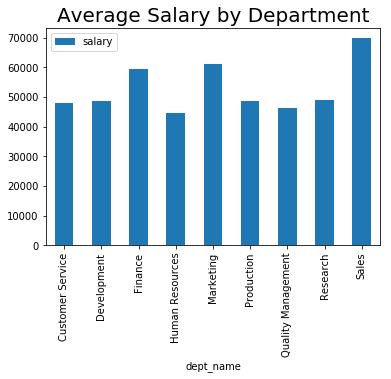

In [58]:
avg_salary_dept.plot.bar()
plt.title('Average Salary by Department', color ="black", size=20)

In [ ]:
#Based on this chart, Pewartt Hackard does not have any Data Sciences analyst. 
#Since the data was cleaned, organized and used to provide useful actionable information,
# as the sole data scientist I shall ask for an annual salary of $100,000!